завдання 1+2 (датасет house_price)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house_price_regression_dataset.csv')

1. Вивести перших 5 рядків.

In [3]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


1.Square_Footage Загальна житлова площа будинку в квадратних футах (або метрах, якщо перекладати в метричну систему). <br>
2.Num_Bedrooms Кількість спалень у будинку.<br>
3.Num_Bathrooms Кількість ванних кімнат. Часто може бути дробовим числом (наприклад, 1.5 – одна повна ванна і один туалет).<br>
4.Year_Built Рік побудови будинку. Може впливати на стан житла, дизайн, матеріали тощо.<br>
5.Lot_Size Розмір ділянки (землі), на якій розташований будинок.<br>
6.Garage_Size Розмір гаража, зазвичай кількість паркомісць (наприклад, 1, 2 тощо).<br>
7.Neighborhood_Quality Оцінка якості району. Це може бути числова шкала (наприклад, 1–10) або категорія. Враховує безпеку, школи, транспорт, інфраструктуру тощо.<br>
8.House_Price Ціна будинку – цільова змінна, яку часто передбачають у моделі.<br>

2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

In [4]:
df = df.fillna(df.mean())

3. Перевірити наявність дублікатів, при виявленні – видалити.


In [5]:
if (df.duplicated().sum()) != 0:
    df = df.drop_duplicates()

4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.


In [6]:
df.nunique()

Square_Footage           894
Num_Bedrooms               5
Num_Bathrooms              3
Year_Built                73
Lot_Size                1000
Garage_Size                3
Neighborhood_Quality      10
House_Price             1000
dtype: int64

5. Перевірити тип даних. При необхідності замінити тип даних на числовий.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання. Побудувати теплову карту кореляції.


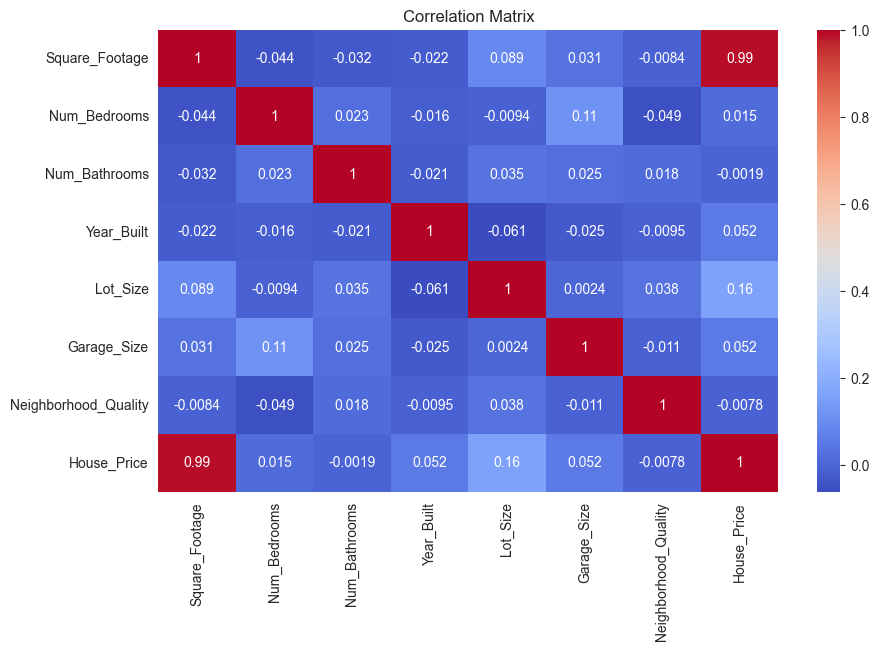

Кореляція:
 House_Price             1.000000
Square_Footage          0.991261
Lot_Size                0.160412
Garage_Size             0.052133
Year_Built              0.051967
Num_Bedrooms            0.014633
Num_Bathrooms          -0.001862
Neighborhood_Quality   -0.007770
Name: House_Price, dtype: float64


In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("Кореляція:\n", df.corr()['House_Price'].sort_values(ascending=False))

7. Масштабувати ознаки.


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [10]:
X = df.drop(columns=['House_Price'])
y = df['House_Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

8. Поділити дані на тренувальну і тестову вибірки.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=17)

9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число)<br>
10. Вивести коефіцієнт детермінації і середньоквадратичну помилку. <br>
11. Побудувати графіки.

+ з завдання 2: 4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.
5. Вивести R2 і MSE. Побудувати графіки.
6. Вивести справжні і прогнозовані значення.


Результати моделей
[LinearRegression] R2 (test): 0.998707 | MAE: 7683.803 | MSE: 89928473.688


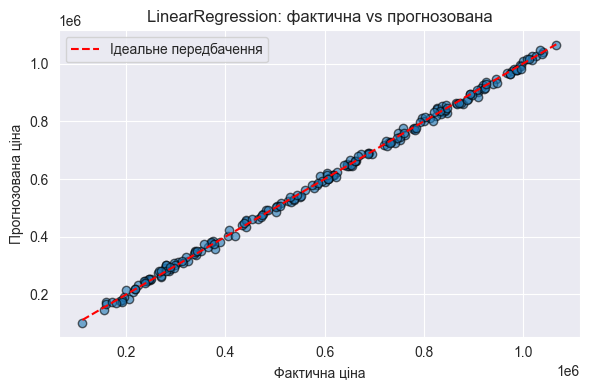

[Ridge] R2 (test): 0.998692 | MAE: 7737.012 | MSE: 91010747.102


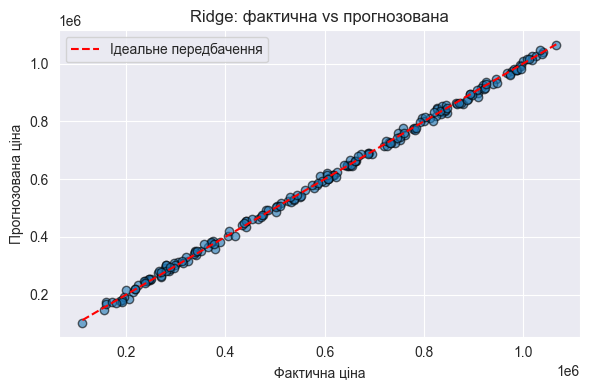

[Lasso] R2 (test): 0.998707 | MAE: 7683.802 | MSE: 89928461.168


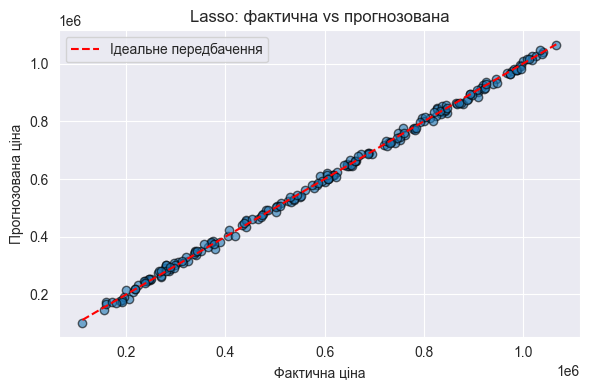

[Random Forest] R2 (test): 0.994283 | MAE: 15993.022 | MSE: 397714471.280


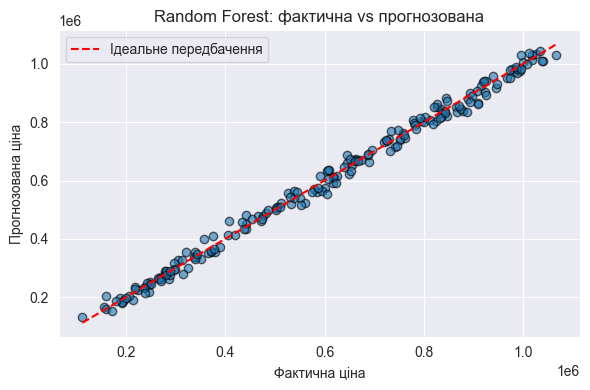

[Gradient Boosting] R2 (test): 0.997050 | MAE: 11477.571 | MSE: 205245427.251


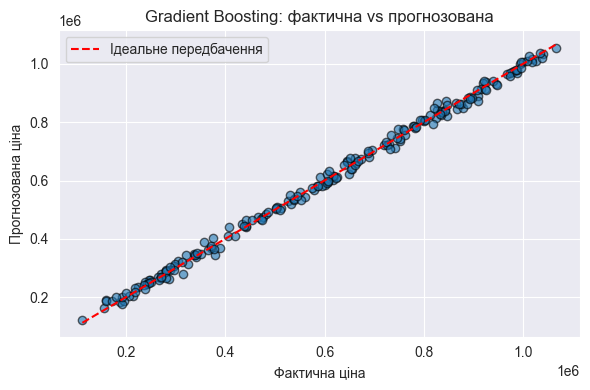

In [12]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

print("\nРезультати моделей")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2_train = model.score(X_train, y_train)
    r2_test = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R2_test": r2_test,
        "MSE": mse
    }

    print(f"[{name}] R2 (test): {r2_test:.6f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

    # 11. Побудова графіків
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ідеальне передбачення')
    plt.xlabel("Фактична ціна")
    plt.ylabel("Прогнозована ціна")
    plt.title(f"{name}: фактична vs прогнозована")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

GridSearch для 3 моделей

In [13]:
print("\nОптимізація параметрів (GridSearch)")

# 1. Ridge GridSearch
param_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_gs = GridSearchCV(Ridge(), param_ridge, cv=3)
ridge_gs.fit(X_train, y_train)
best_ridge = ridge_gs.best_estimator_
print(f"Найкращі параметри Ridge: {ridge_gs.best_params_}")

# 2. Random Forest GridSearch
param_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_gs = GridSearchCV(RandomForestRegressor(random_state=42), param_rf, cv=3)
rf_gs.fit(X_train, y_train)
best_rf = rf_gs.best_estimator_
print(f"Найкращі параметри RF: {rf_gs.best_params_}")

# Лінійна регресія
best_lr = LinearRegression()
best_lr.fit(X_train, y_train)

# Порівняння оптимізованих моделей
optimized_models = {
    "Optimized Ridge": best_ridge,
    "Optimized RF": best_rf,
    "Linear Regression": best_lr
}

print("\nРезультати після GridSearch")
for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"[{name}] R2: {r2:.6f} | MSE: {mse:.3f}")

# Порівняння RF до та після
print("\nВисновок по Random Forest")
mse_rf_base = results["Random Forest"]["MSE"]
mse_rf_opt = mean_squared_error(y_test, best_rf.predict(X_test))
print(f"MSE до підбору: {mse_rf_base:.2f}")
print(f"MSE після підбору: {mse_rf_opt:.2f}")
if mse_rf_opt < mse_rf_base:
    print("Модель з підібраними параметрами працює краще.")
else:
    print("Базові параметри були достатньо хорошими або GridSearch не знайшов кращих в цьому діапазоні.")


Оптимізація параметрів (GridSearch)
Найкращі параметри Ridge: {'alpha': 0.1}
Найкращі параметри RF: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Результати після GridSearch
[Optimized Ridge] R2: 0.998706 | MSE: 90026324.499
[Optimized RF] R2: 0.994238 | MSE: 400820460.639
[Linear Regression] R2: 0.998707 | MSE: 89928473.688

Висновок по Random Forest
MSE до підбору: 397714471.28
MSE після підбору: 400820460.64
Базові параметри були достатньо хорошими або GridSearch не знайшов кращих в цьому діапазоні.


12. Вивести справжні і прогнозовані значення.

In [14]:
final_pred = best_lr.predict(X_test)

comparison_df = pd.DataFrame({
    "Фактична ціна": y_test.values,
    "Передбачена ціна": final_pred,
})
comparison_df["Похибка, %"] = (np.abs(comparison_df["Передбачена ціна"] - comparison_df["Фактична ціна"]) / comparison_df["Фактична ціна"]) * 100

print("Порівняльна таблиця (10 випадкових рядків)")
print(comparison_df.sample(10, random_state=42).round(2))

Порівняльна таблиця (10 випадкових рядків)
     Фактична ціна  Передбачена ціна  Похибка, %
95      1017583.43        1012134.37        0.54
15       285546.50         280338.81        1.82
30       336153.43         340383.19        1.26
158      296291.00         291813.08        1.51
128      190802.07         182294.42        4.46
115      888184.30         875384.11        1.44
69       654466.95         645231.25        1.41
170      179398.43         171914.30        4.17
174      545482.74         545122.04        0.07
45       842172.21         835247.65        0.82


ВИСНОВОК:<br>
У ході виконання лабораторної роботи був опанований повний цикл розробки моделі машинного навчання: від попередньої обробки даних до візуалізації залежностей та побудови прогнозних моделей (Лінійна регресія, Ridge, Lasso, Random Forest). Розглянули, як треба оцінювати якість моделей за допомогою метрик R^2, MAE та MSE, а також оптимізувати гіперпараметри за допомогою GridSearchCV для покращення результатів. <br> За результатами кореляційного аналізу було встановлено, що вирішальним фактором у ціноутворенні є площа житла (Square_Footage), яка має майже ідеальну лінійну залежність із цільовою змінною. Саме тому простіші моделі, такі як Лінійна регресія, показали дуже високу точність, не поступаючись складнішим методам.